In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
X = dataset.iloc[:, [3, 4]].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
cluster_labels = optics.fit_predict(X_scaled)

In [6]:
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Number of clusters found: {num_clusters}')

Number of clusters found: 4


In [7]:
dataset['Cluster_group'] = cluster_labels


In [8]:
dataset.to_csv("cluster_hdbscan.csv", index=False)

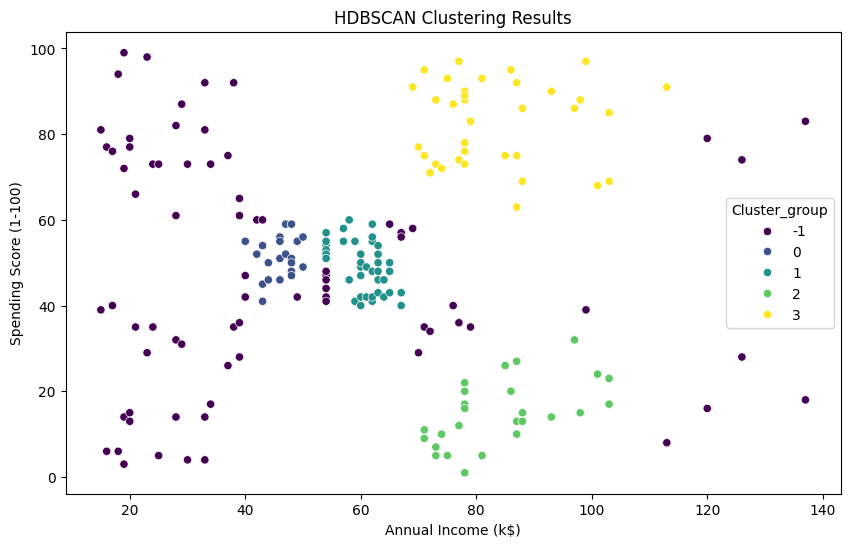

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x=dataset.columns[3], y=dataset.columns[4], hue='Cluster_group', palette='viridis', legend='full')
plt.title('HDBSCAN Clustering Results')
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.show()